In [1]:
#import libraries
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [3]:
#Read colour image
image = cv2.imread("/content/WhatsApp Image 2024-08-26 at 23.43.16.jpeg", cv2.IMREAD_COLOR)

array([[[ 66,  85, 100],
        [ 67,  86, 101],
        [ 67,  86, 101],
        ...,
        [222, 229, 238],
        [222, 229, 238],
        [222, 229, 238]],

       [[ 66,  85, 100],
        [ 67,  86, 101],
        [ 68,  87, 102],
        ...,
        [222, 229, 238],
        [222, 229, 238],
        [222, 229, 238]],

       [[ 67,  86, 101],
        [ 67,  86, 101],
        [ 68,  87, 102],
        ...,
        [222, 229, 238],
        [222, 229, 238],
        [222, 229, 238]],

       ...,

       [[ 27,  43,  36],
        [ 48,  64,  57],
        [ 57,  75,  68],
        ...,
        [114, 112, 104],
        [132, 125, 116],
        [143, 132, 124]],

       [[ 28,  44,  37],
        [ 45,  61,  54],
        [ 47,  65,  58],
        ...,
        [117, 115, 105],
        [138, 127, 119],
        [157, 144, 136]],

       [[ 43,  59,  52],
        [ 53,  69,  62],
        [ 48,  66,  59],
        ...,
        [121, 116, 107],
        [137, 126, 118],
        [163, 147, 140]]], dtype=uint8)
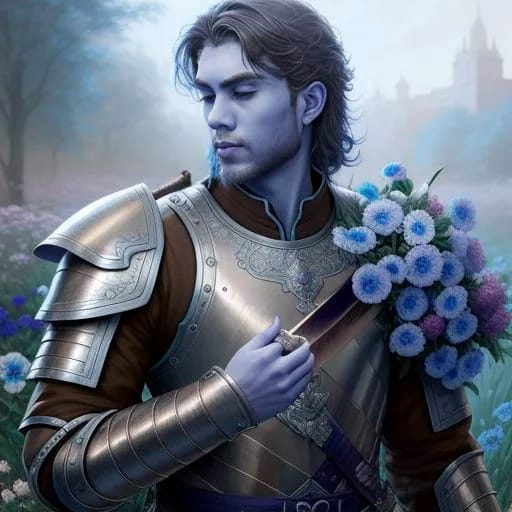

In [4]:
image

In [5]:
#Convert BGR to RGB since cv2 reads in BGR
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

array([[[100,  85,  66],
        [101,  86,  67],
        [101,  86,  67],
        ...,
        [238, 229, 222],
        [238, 229, 222],
        [238, 229, 222]],

       [[100,  85,  66],
        [101,  86,  67],
        [102,  87,  68],
        ...,
        [238, 229, 222],
        [238, 229, 222],
        [238, 229, 222]],

       [[101,  86,  67],
        [101,  86,  67],
        [102,  87,  68],
        ...,
        [238, 229, 222],
        [238, 229, 222],
        [238, 229, 222]],

       ...,

       [[ 36,  43,  27],
        [ 57,  64,  48],
        [ 68,  75,  57],
        ...,
        [104, 112, 114],
        [116, 125, 132],
        [124, 132, 143]],

       [[ 37,  44,  28],
        [ 54,  61,  45],
        [ 58,  65,  47],
        ...,
        [105, 115, 117],
        [119, 127, 138],
        [136, 144, 157]],

       [[ 52,  59,  43],
        [ 62,  69,  53],
        [ 59,  66,  48],
        ...,
        [107, 116, 121],
        [118, 126, 137],
        [140, 147, 163]]], dtype=uint8)
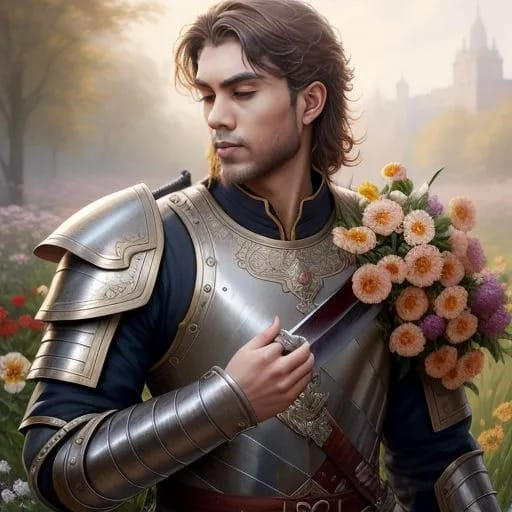

In [6]:
image

In [7]:
#Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

array([[ 81,  82,  82, ..., 228, 228, 228],
       [ 81,  82,  83, ..., 228, 228, 228],
       [ 82,  82,  83, ..., 228, 228, 228],
       ...,
       [ 37,  58,  69, ..., 112, 126, 134],
       [ 38,  55,  59, ..., 114, 129, 147],
       [ 53,  63,  60, ..., 116, 128, 151]], dtype=uint8)
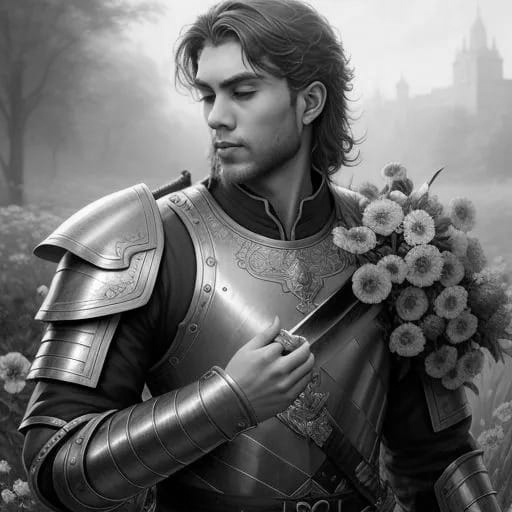

In [8]:
gray

In [9]:
# Define Sobel filter
def sobel_edge_detection(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    sobel_edges = cv2.magnitude(sobel_x, sobel_y)
    return np.uint8(sobel_edges)

In [10]:
# Define Prewitt filter
def prewitt_edge_detection(image):
    prewitt_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=np.float32)
    prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32)

    grad_x = cv2.filter2D(image, cv2.CV_64F, prewitt_x)
    grad_y = cv2.filter2D(image, cv2.CV_64F, prewitt_y)

    prewitt_edges = cv2.magnitude(grad_x, grad_y)
    return np.uint8(prewitt_edges)

In [11]:
# Define Roberts filter
def roberts_edge_detection(image):
    roberts_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
    roberts_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)

    grad_x = cv2.filter2D(image, cv2.CV_64F, roberts_x)
    grad_y = cv2.filter2D(image, cv2.CV_64F, roberts_y)

    roberts_edges = cv2.magnitude(grad_x,grad_y)
    return np.uint8(roberts_edges)

In [12]:
# Apply edge detection methods
sobel_edges = sobel_edge_detection(image)
prewitt_edges = prewitt_edge_detection(image)
roberts_edges = roberts_edge_detection(image)

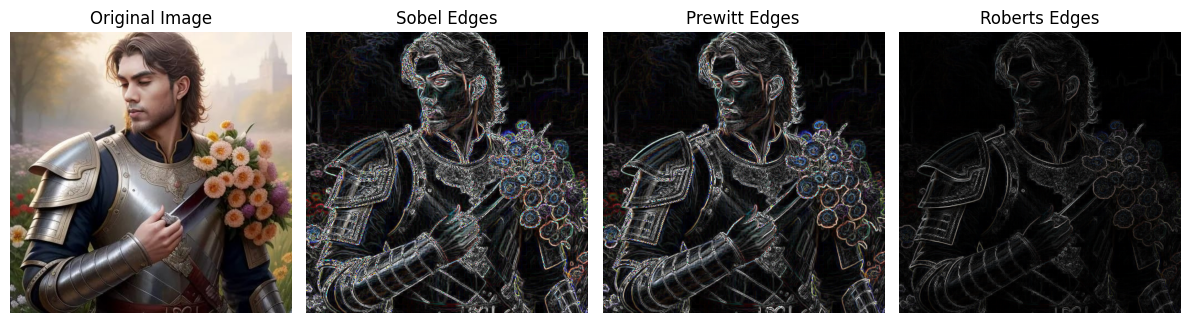

In [13]:
# Plot results
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Sobel Edges')
plt.imshow(sobel_edges, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('Prewitt Edges')
plt.imshow(prewitt_edges, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('Roberts Edges')
plt.imshow(roberts_edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()